<a href="https://colab.research.google.com/github/amr552/Deep-Learning/blob/main/(Inception_V3)_DLcourseara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#InceptionV3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


Epoch 1/25
41/41 [==============================] - 844s 20s/step - loss: 3.3116 - accuracy: 0.7465 - val_loss: 793325.5000 - val_accuracy: 0.4062
Epoch 2/25
41/41 [==============================] - 785s 19s/step - loss: 0.9434 - accuracy: 0.9054 - val_loss: 14597.3887 - val_accuracy: 0.3438
Epoch 3/25
41/41 [==============================] - 796s 19s/step - loss: 0.6569 - accuracy: 0.9705 - val_loss: 325.3687 - val_accuracy: 0.6875
Epoch 4/25
41/41 [==============================] - 777s 19s/step - loss: 0.5429 - accuracy: 0.9729 - val_loss: 3.6526 - val_accuracy: 0.9688
Epoch 5/25
41/41 [==============================] - 778s 19s/step - loss: 0.4872 - accuracy: 0.9721 - val_loss: 2.3633 - val_accuracy: 0.9688
Epoch 6/25
41/41 [==============================] - 777s 19s/step - loss: 0.4997 - accuracy: 0.9651 - val_loss: 0.3656 - val_accuracy: 0.9688
Epoch 7/25
41/41 [==============================] - 782s 19s/step - loss: 0.9155 - accuracy: 0.9202 - val_loss: 106.3376 - val_accuracy: 

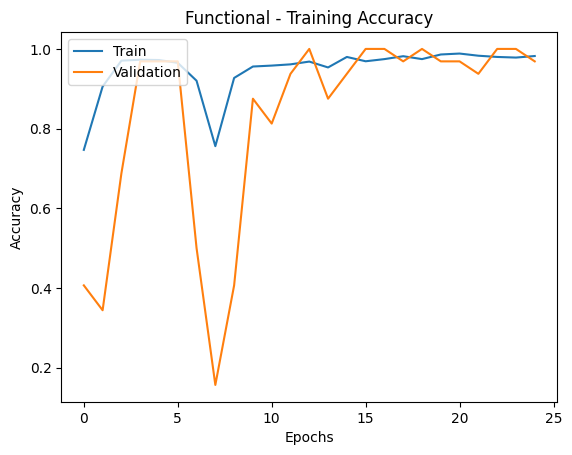

5/5 [==============================] - 27s 5s/step - loss: 0.6320 - accuracy: 0.9333
Test Accuracy: 0.9333
5/5 [==============================] - 29s 5s/step


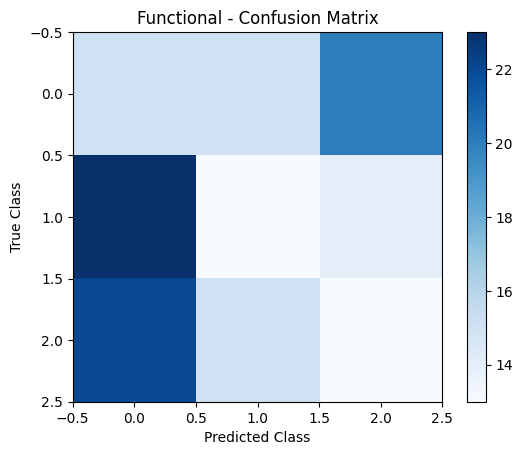

              precision    recall  f1-score   support

     Healthy       0.25      0.30      0.27        50
     Powdery       0.30      0.26      0.28        50
        Rust       0.28      0.26      0.27        50

    accuracy                           0.27       150
   macro avg       0.28      0.27      0.27       150
weighted avg       0.28      0.27      0.27       150



<ipython-input-4-916b8e11cb39>:144: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_modelInceptionV3.h5')
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import save_model


# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set the paths to your training and test datasets

train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"
val_dir = "/content/drive/MyDrive/datasets/plant_disease/Validation/Validation"
# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,  # Reduce shearing intensity
    zoom_range=0.1,  # Reduce zooming intensity
    rotation_range=10,
    #shear_range=0.2,
    #zoom_range=0.2,
    #rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets with data augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

model =InceptionV3(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))


base_model = model
model_name = base_model.__class__.__name__

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
# Add Dropout layer with 20% dropout rate
model.add(Dropout(0.2))  # Experiment with different dropout rates

# Dense layer with L2 regularization (weight decay)
model.add(Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Adjust weight decay as needed
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

    # Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model checkpoint to save the best model based on validation loss
#model_checkpoint = ModelCheckpoint('best_modelInceptionV3.h5', save_best_only=True, monitor='val_loss', mode='min')
# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model checkpoint to save the best model based on validation loss
#model_checkpoint = ModelCheckpoint('best_modelInceptionV3.h5', save_best_only=True, monitor='val_loss', mode='min')


model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["accuracy"],
)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    #callbacks=[early_stopping, model_checkpoint]
)

# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{model_name} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

#test step
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Generate confusion matrix
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{model_name} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Calculate evaluation metrics
report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print(report)

save_model(model, f'saved_modelInceptionV3.h5')
model.save('/content/drive/MyDrive/datasets/plant disease/models/÷Inceptionv3.h5')



In [ ]:
#libraries
import tensorflow as tf
#load fashion_mnist data set
data1=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=data1.load_data()

#Normalize the pixel values
training_images=training_images/255.0
test_images=test_images/255.0


In [ ]:
#define the model
model=tf.keras.models.Sequential([
    #adding filters and maxpooling
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(255,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)

])

model.summary()
#set up training model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#training dataset
print('taining the model')
model.fit(training_images,training_labels,epochs=5)
#evaluate the model
print('evaluating the model !!')
test_loss=model.evaluate(test_images,test_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 255)       294015    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 255)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6375)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 29ms/step


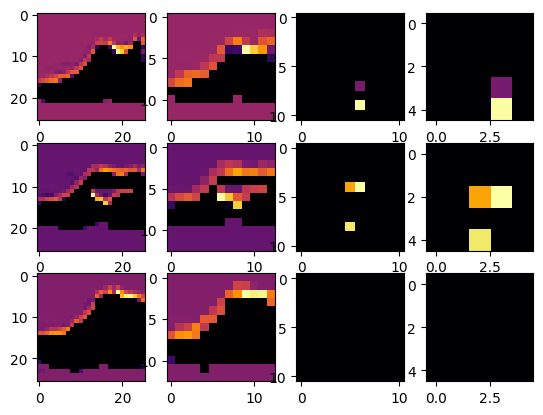

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr=plt.subplots(3,4)

First_image=0
Second_image=23
Third_image=28
CONVOLUTION_MEMBER=1

layer_outputs = [layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)

for x in range(0,4):
  f1=activation_model.predict(test_images[First_image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_MEMBER],cmap='inferno')
  axarr[0,x].grid(False)

  f2=activation_model.predict(test_images[Second_image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_MEMBER],cmap='inferno')
  axarr[1,x].grid(False)

  f3=activation_model.predict(test_images[Third_image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_MEMBER],cmap='inferno')
  axarr[2,x].grid(False)

